### Importing necessary libraries

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
import pandas as pd
pd.set_option('display.max_columns', 500)

### Here is the information on this particular data set:
0. loan_amnt : The listed amount of the loan applied for by the borrower. If at some point
in time, the credit department reduces the loan amount, then it will be reflected in this
value.
1. term : The number of payments on the loan. Values are in months and can be either 36
or 60.
2. int_rate : Interest Rate on the loan
3. installment : The monthly payment owed by the borrower if the loan originates.
4. grade LC : assigned loan grade
5. sub_grade LC : assigned loan subgrade
6. emp_title : The job title supplied by the Borrower when applying for the loan.
7. emp_length : Employment length in years. Possible values are between 0 and 10 where
0 means less than one year and 10 means ten or more years.
8. home_ownership : The home ownership status provided by the borrower during
registration or obtained from the credit report. Our values are: RENT, OWN,
MORTGAGE, OTHER
9. annual_inc : The self-reported annual income provided by the borrower during
registration.
10. verification_status : Indicates if income was verified by LC, not verified, or if the income
source was verified
11. issue_d : The month which the loan was funded
12. loan_status : Current status of the loan
13. purpose : A category provided by the borrower for the loan request.
14. title : The loan title provided by the borrower
15. zip_code : The first 3 numbers of the zip code provided by the borrower in the loan
application.
16. addr_state : The state provided by the borrower in the loan application
17. dti : A ratio calculated using the borrower’s total monthly debt payments on the total
debt obligations, excluding mortgage and the requested LC loan, divided by the
borrower’s self-reported monthly income.
18. earliest_cr_line : The month the borrower's earliest reported credit line was opened
19. open_acc : The number of open credit lines in the borrower's credit file.
20. pub_rec : Number of derogatory public records
21. revol_bal : Total credit revolving balance
22. revol_util : Revolving line utilization rate, or the amount of credit the borrower is using
relative to all available revolving credit.
23. total_acc : The total number of credit lines currently in the borrower's credit file
24. initial_list_status : The initial listing status of the loan. Possible values are – W, F
25. application_type : Indicates whether the loan is an individual application or a joint
application with two co-borrowers
26. mort_acc : Number of mortgage accounts.
27. pub_rec_bankruptcies : Number of public record bankruptcies


In [52]:
data=pd.read_csv('./logistic_regression.csv')

In [53]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [54]:
# Shape of the dataset -
print("No. of rows: ", data.shape[0])
print("No. of columns: ", data.shape[1])

No. of rows:  396030
No. of columns:  27


In [55]:
# Checking the distribution of outcome labels -
data.loan_status.value_counts(normalize=True)*100

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: proportion, dtype: float64

In [56]:
# Statistical summary of the dataset -
data.describe(include='all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,396030,396030,396030,396030,394274,396030.000000,396030,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,3,115,2,14,48816,NaN,684,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,Verified,Oct-2014,Fully Paid,debt_consolidation,Debt consolidation,NaN,Oct-2000,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USCGC Smith\r\nFPO AE 70466
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,139563,14846,318357,234507,152472,NaN,3017,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,NaN,NaN,NaN,NaN,NaN,17.379514,NaN,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,NaN,NaN,NaN,NaN,NaN,18.019092,NaN,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,NaN,NaN,NaN,NaN,NaN,11.280000,NaN,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,NaN,NaN,NaN,NaN,NaN,16.910000,NaN,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,NaN,NaN,NaN,NaN,NaN,22.980000,NaN,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

## Correlation Heatmap
A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete
dimensions, using colored cells to represent data from usually a monochromatic scale. The
values of the first dimension appear as the rows of the table while of the second dimension
as a column. The color of the cell is proportional to the number of measurements that match
the dimensional value. This makes correlation heatmaps ideal for data analysis since it
makes patterns easily readable and highlights the diﬀerences and variation in the same data.
A correlation heatmap, like a regular heatmap, is assisted by a colorbar making data easily
readable and comprehensible.

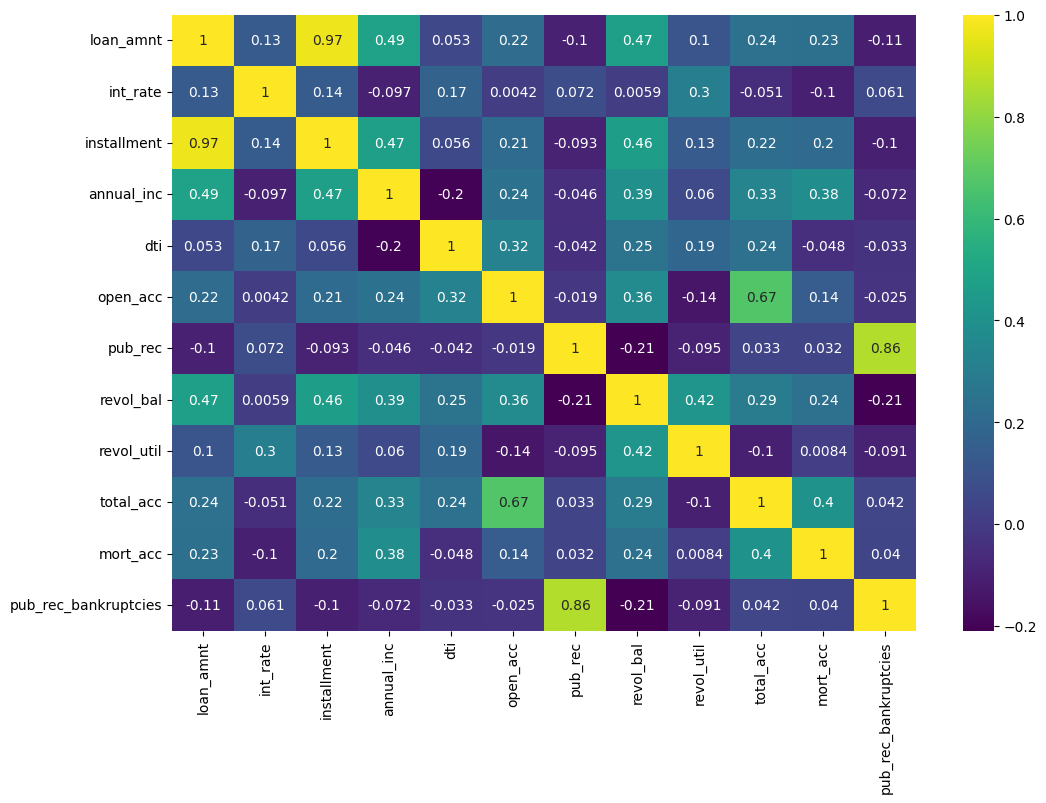

In [58]:
plt.figure(figsize=(12, 8))
numeric_corr = data.select_dtypes(include='number').corr(method='spearman')
sns.heatmap(numeric_corr, annot=True, cmap='viridis')
plt.show()

## you can check this converting your loan status into 0 & 1 

We noticed almost perfect correlation between "loan_amnt" the "installment" feature.
- installment: The monthly payment owed by the borrower if the loan originates.
- loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in
time, the credit department reduces the loan amount, then it will be reflected in this
value.

So, we can drop either one of those columns.

In [59]:
data.drop(columns=['installment'], axis=1, inplace=True)

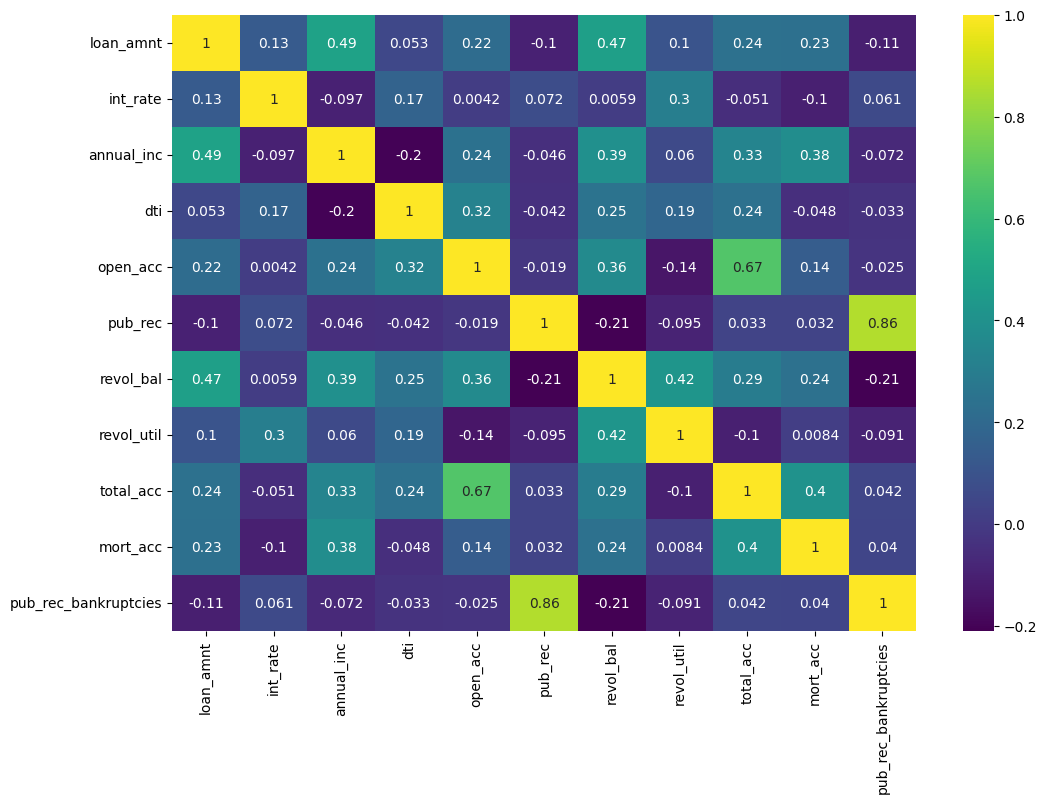

In [60]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.select_dtypes(include='number').corr(method='spearman'), annot=True, cmap='viridis')
plt.show()

# Data Exploration

1. The no of people those who have fully paid are 318357 and that of Charged Oﬀ are 77673.

In [61]:
data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


2. The majority of people have home ownership as Mortgage and Rent.

In [62]:
data['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

3. Combininging the minority classes as 'OTHER'
.

In [65]:
data.loc[(data.home_ownership == 'ANY') | (data.home_ownership == 'NONE') , 'home_ownership'] = 'OTHER'
data.home_ownership.value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

In [66]:
data['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

In [67]:
data['issue_d'] = pd.to_datetime(data['issue_d'])
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])

/var/folders/r3/3q081xqd60b3vq3grxzz89jr0000gn/T/ipykernel_9392/836848778.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_d'] = pd.to_datetime(data['issue_d'])
/var/folders/r3/3q081xqd60b3vq3grxzz89jr0000gn/T/ipykernel_9392/836848778.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])


5. Saw some issues in title (Looks like it was filled manually and needs some fixing).

In [68]:
data['title'].value_counts()[:20]

title
Debt consolidation           152472
Credit card refinancing       51487
Home improvement              15264
Other                         12930
Debt Consolidation            11608
Major purchase                 4769
Consolidation                  3852
debt consolidation             3547
Business                       2949
Debt Consolidation Loan        2864
Medical expenses               2742
Car financing                  2139
Credit Card Consolidation      1775
Vacation                       1717
Moving and relocation          1689
consolidation                  1595
Personal Loan                  1591
Consolidation Loan             1299
Home Improvement               1268
Home buying                    1183
Name: count, dtype: int64

In [69]:
data['title'] = data.title.str.lower()

In [70]:
data.title.value_counts()[:10]

title
debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
Name: count, dtype: int64

# Visualization

The grade of majority of people those who have fully paid the loan is 'B' and have subgrade
'B3'



So from where we can infer that people with grade 'B' and subgrade 'B3' are more likely to
fully pay the loan.

/var/folders/r3/3q081xqd60b3vq3grxzz89jr0000gn/T/ipykernel_9392/2892493547.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


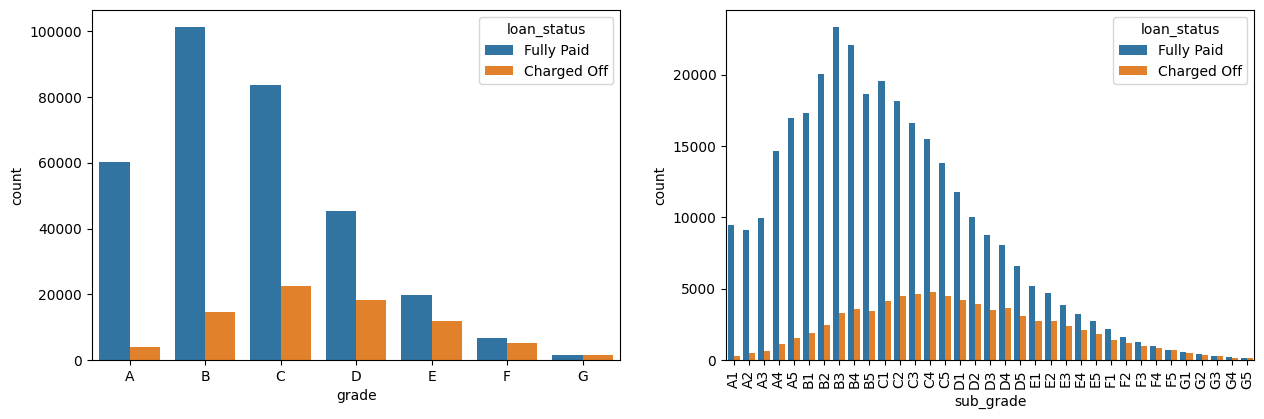

In [71]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
grade = sorted(data.grade.unique().tolist())
sns.countplot(x='grade', data=data, hue='loan_status', order=grade)
plt.subplot(2, 2, 2)
sub_grade = sorted(data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=data, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [72]:
grade

['A', 'B', 'C', 'D', 'E', 'F', 'G']

/var/folders/r3/3q081xqd60b3vq3grxzz89jr0000gn/T/ipykernel_9392/1697501444.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


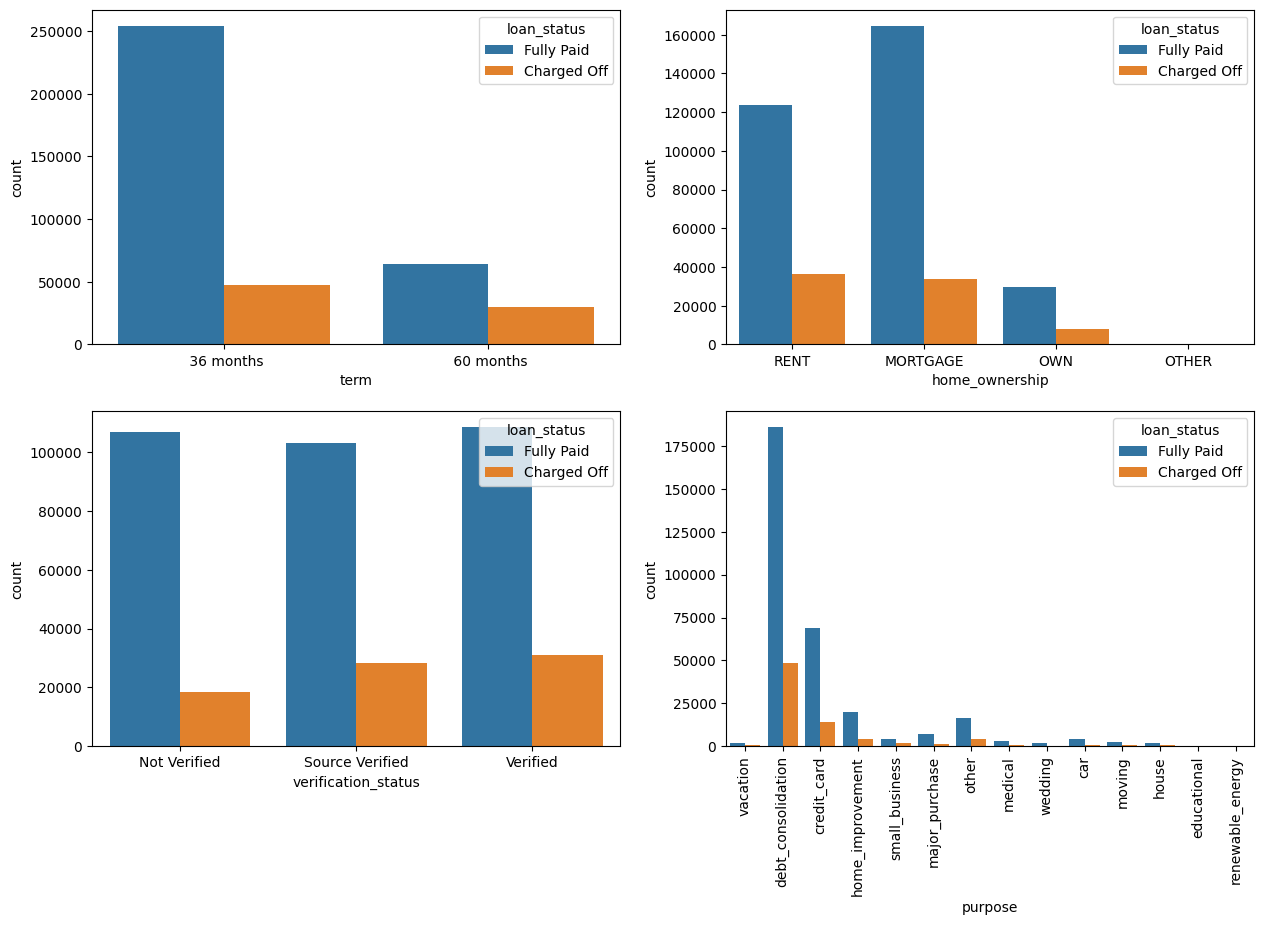

In [73]:
plt.figure(figsize=(15, 20))
plt.subplot(4, 2, 1)
sns.countplot(x='term', data=data, hue='loan_status')
plt.subplot(4, 2, 2)
sns.countplot(x='home_ownership', data=data, hue='loan_status')
plt.subplot(4, 2, 3)
sns.countplot(x='verification_status', data=data, hue='loan_status')
plt.subplot(4, 2, 4)
g = sns.countplot(x='purpose', data=data, hue='loan_status')
g.set_xticklabels(g.get_xticklabels(), rotation=90);

# Insights: Manager & Teacher are the most afforded loan job titles

/var/folders/r3/3q081xqd60b3vq3grxzz89jr0000gn/T/ipykernel_9392/938852859.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90);


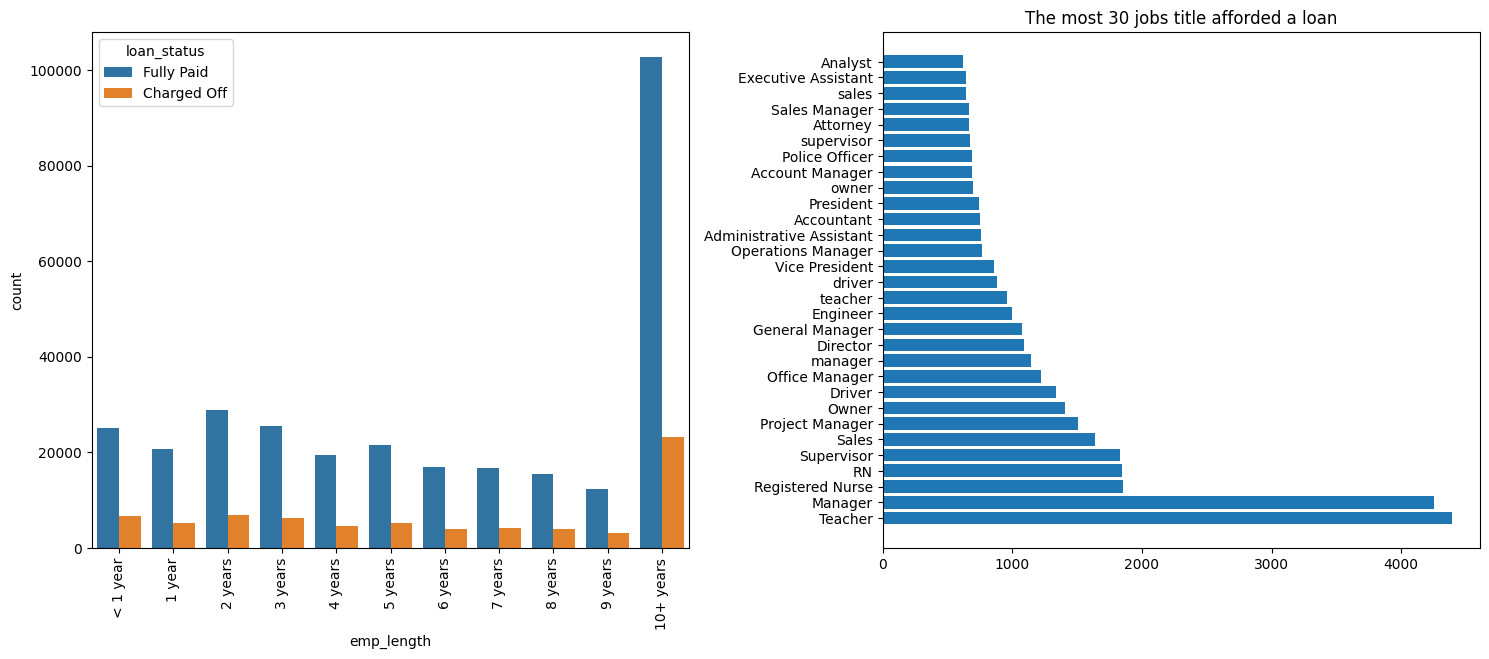

In [75]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 2, 1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years',]
g = sns.countplot(x='emp_length', data=data, hue='loan_status', order=order)
g.set_xticklabels(g.get_xticklabels(), rotation=90);
plt.subplot(2, 2, 2)
plt.barh(data.emp_title.value_counts()[:30].index, data.emp_title.value_counts()[:30].values)
plt.title("The most 30 jobs title afforded a loan")
plt.tight_layout()

# Feature Engineering

In [77]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [78]:
data['pub_rec'] = data.pub_rec.apply(pub_rec)
data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

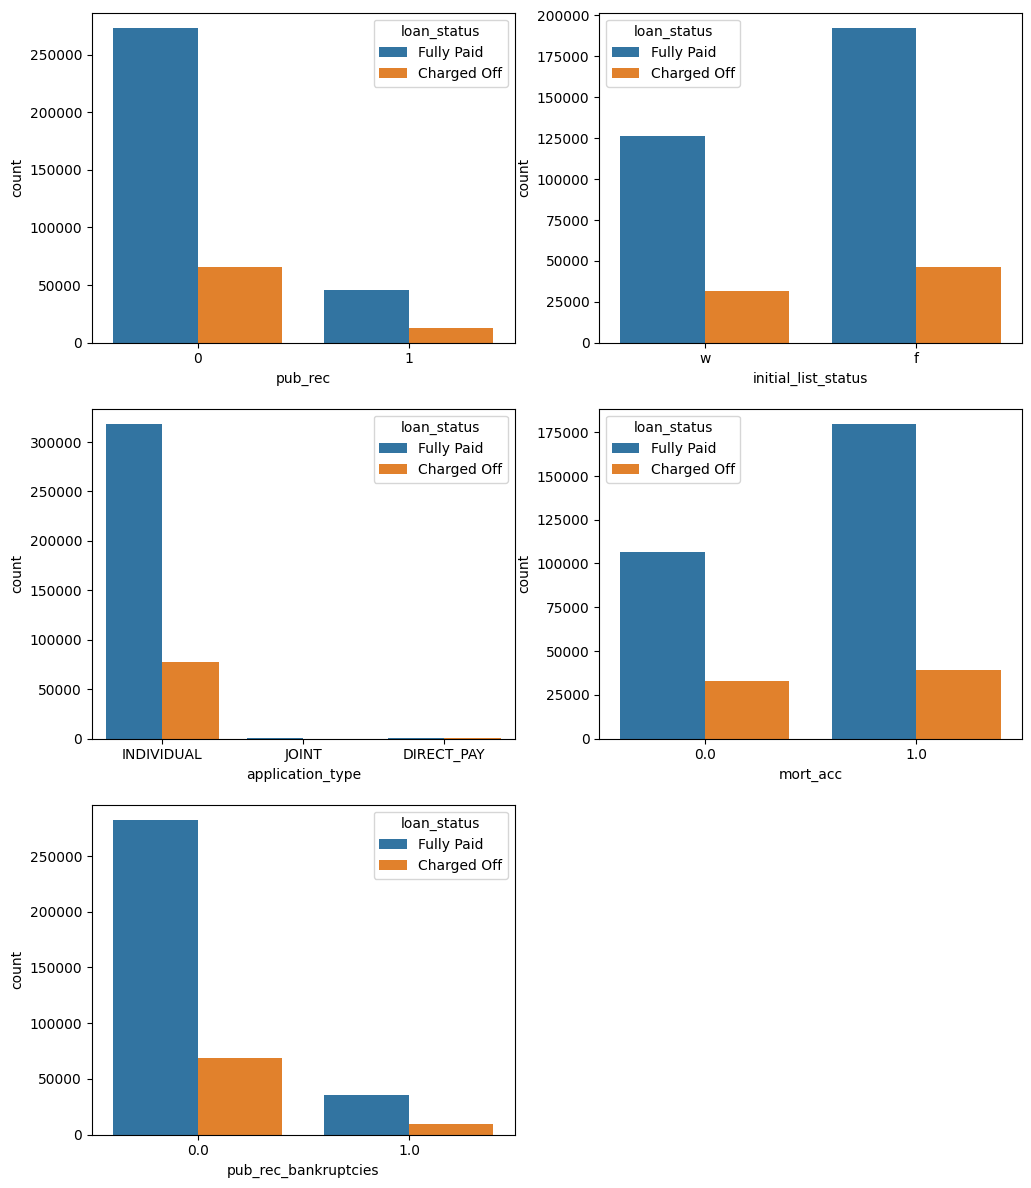

In [79]:
plt.figure(figsize=(12, 30))
plt.subplot(6, 2, 1)
sns.countplot(x='pub_rec', data=data, hue='loan_status')
plt.subplot(6, 2, 2)
sns.countplot(x='initial_list_status', data=data, hue='loan_status')
plt.subplot(6, 2, 3)
sns.countplot(x='application_type', data=data, hue='loan_status')
plt.subplot(6, 2, 4)
sns.countplot(x='mort_acc', data=data, hue='loan_status')
plt.subplot(6, 2, 5)
sns.countplot(x='pub_rec_bankruptcies', data=data, hue='loan_status')
plt.show()

In [80]:
# Mapping of target variable -
data['loan_status'] = data.loan_status.map({'Fully Paid':0, 'Charged Off':1})

In [81]:
data.isnull().sum()/len(data)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

# Very Important: Mean Imputation

In [82]:
data.groupby(by='total_acc')['mort_acc'].median()

total_acc
2.0      0.0
3.0      0.0
4.0      0.0
5.0      0.0
6.0      0.0
        ... 
124.0    1.0
129.0    1.0
135.0    1.0
150.0    1.0
151.0    0.0
Name: mort_acc, Length: 118, dtype: float64

In [89]:
total_acc_avg = data.groupby(by='total_acc')['mort_acc'].median()
# Saving mean of mort_acc according to total_acc_avg (you can pick any other statistic like mean etc.,)

In [90]:
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [91]:
data['mort_acc'] = data.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [92]:
data.isnull().sum()/len(data)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [93]:
# Current no. of rows -
data.shape

(396030, 26)

In [94]:
# Dropping rows with null values - # do your own research
data.dropna(inplace=True)

In [95]:
# Remaining no. of rows -
data.shape

(370621, 26)

# Outlier Detection & Treatment

In [96]:
numerical_data = data.select_dtypes(include='number')
num_cols = numerical_data.columns
len(num_cols)

12

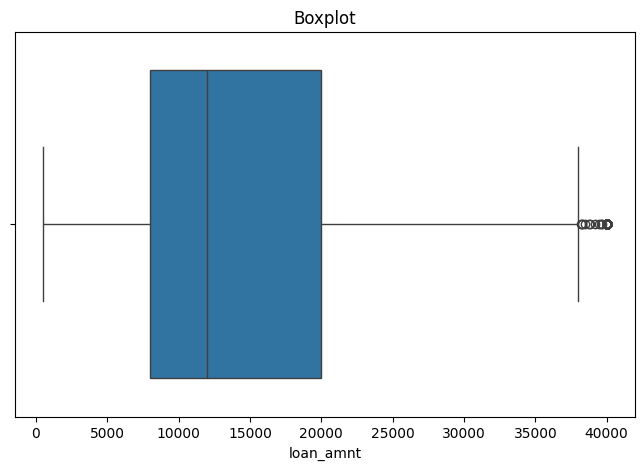

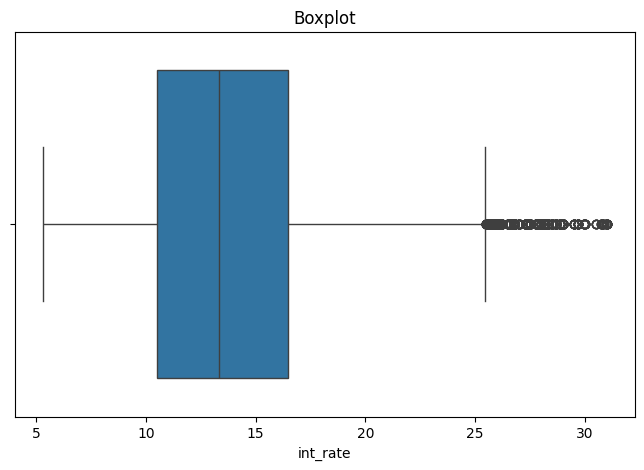

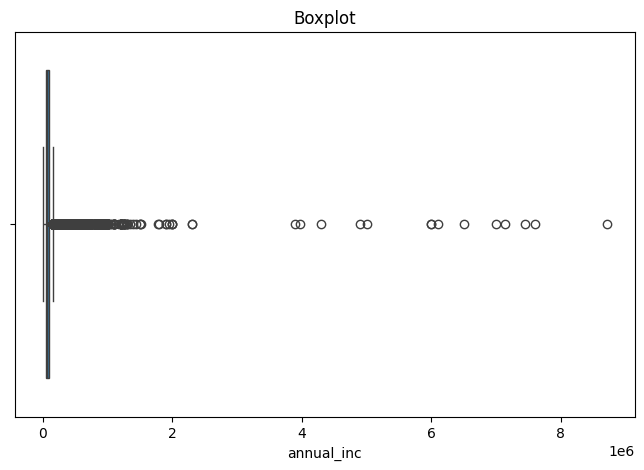

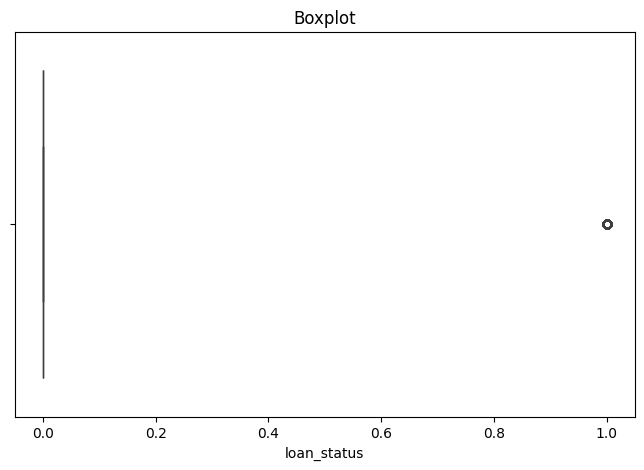

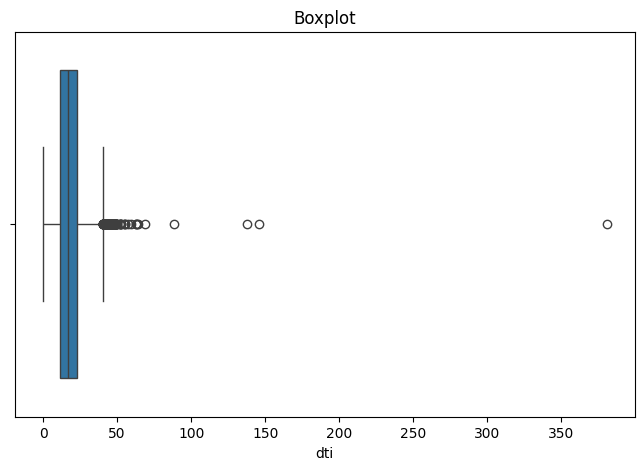

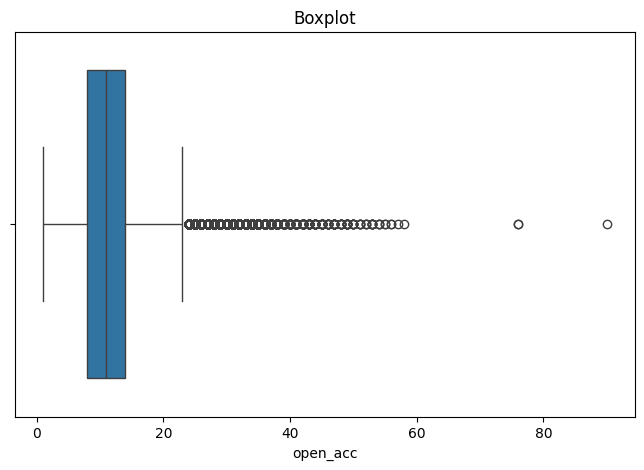

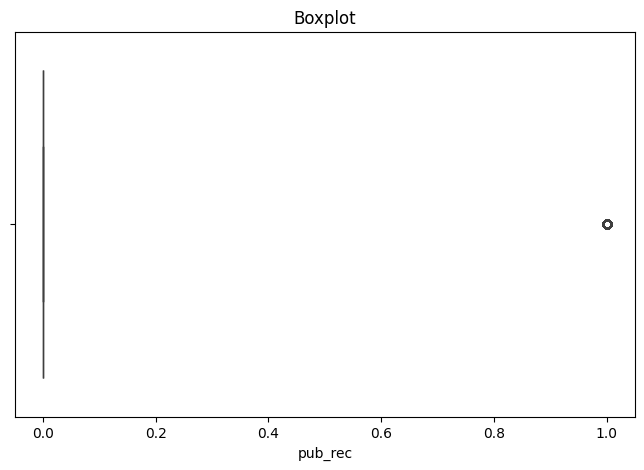

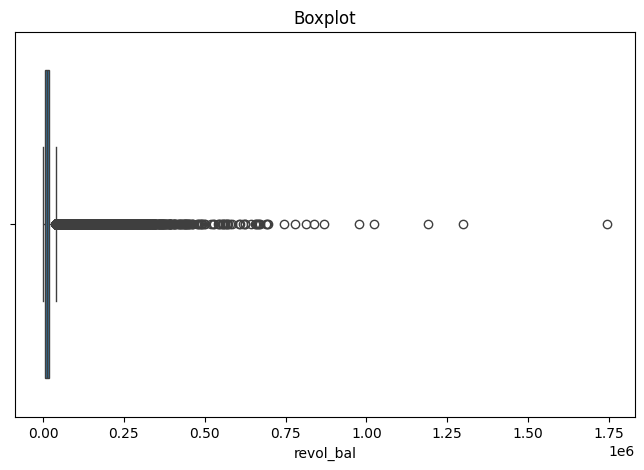

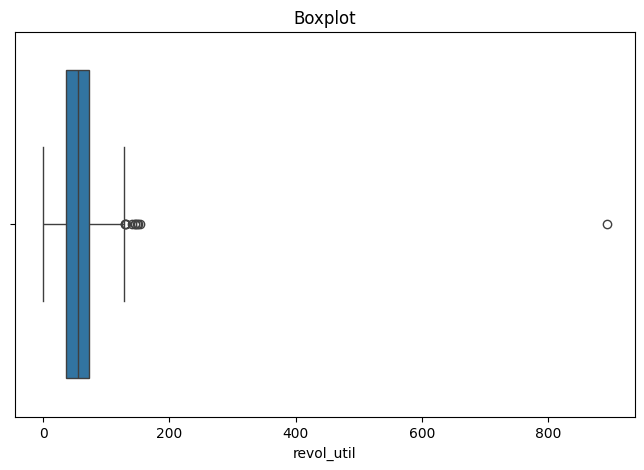

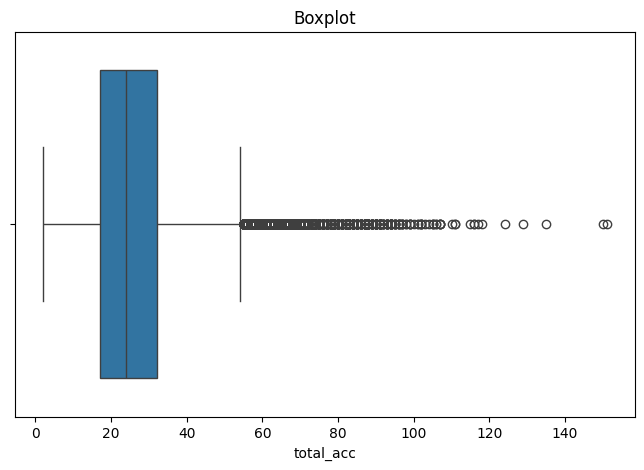

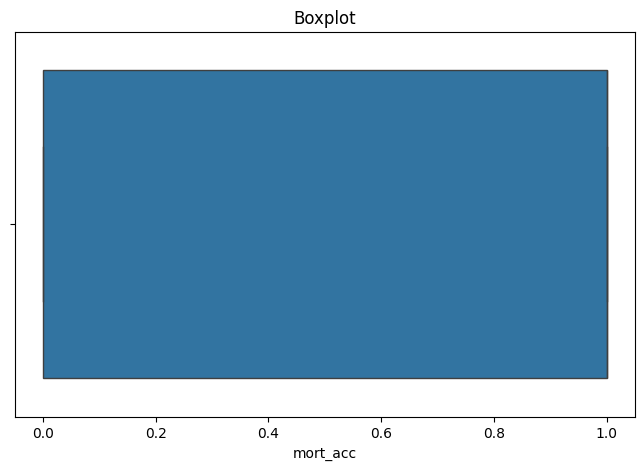

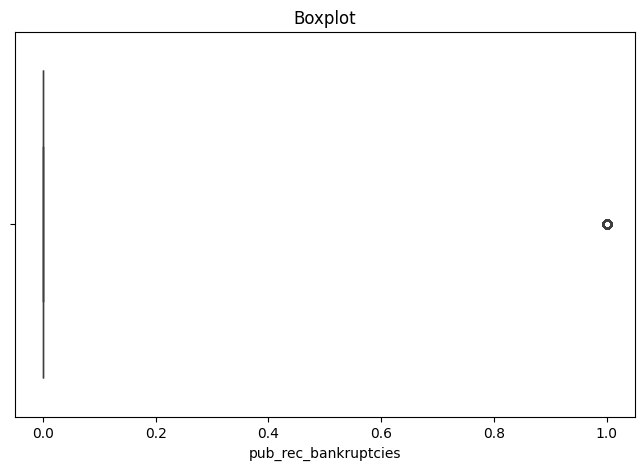

In [97]:
def box_plot(col):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=data[col])
    plt.title('Boxplot')
    plt.show()
for col in num_cols:
    box_plot(col)

In [98]:
for col in num_cols:
    mean = data[col].mean()
    std = data[col].std()
    upper_limit = mean+3*std
    lower_limit = mean-3*std
    data = data[(data[col]<upper_limit) & (data[col]>lower_limit)]
data.shape

(354518, 26)

# Data Preprocessing

In [99]:
# Term -
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [100]:
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)

In [101]:
# Initial List Status -
data['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [102]:
list_status = {'w': 0, 'f': 1}
data['initial_list_status'] = data.initial_list_status.map(list_status)

In [104]:
# Let's fetch ZIP from address and then drop the remaining details -
data['zip_code'] = data.address.apply(lambda x: x[-5:])

In [105]:
data['zip_code'].value_counts(normalize=True)*100

zip_code
70466    14.382062
30723    14.277413
22690    14.268387
48052    14.127068
00813    11.610130
29597    11.537073
05113    11.516764
93700     2.774753
11650     2.772779
86630     2.733571
Name: proportion, dtype: float64

In [106]:
# Dropping some variables which IMO we can let go for now -
data.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade',
'address', 'earliest_cr_line', 'emp_length'],
axis=1, inplace=True)
#target encoding - freqency mappingx˚
#a - number of rows
#b

# One Hot Encoding

In [108]:
dummies = ['purpose', 'zip_code', 'grade', 'verification_status', 'application_type']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

In [109]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data.head()

,loan_amnt,term,int_rate,home_ownership,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT
0,10000.0,36,11.44,RENT,117000.0,0,26.24,16.0,0,36369.0,41.8,25.0,0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
1,8000.0,36,11.99,MORTGAGE,65000.0,0,22.05,17.0,0,20131.0,53.3,27.0,1,1.0,0.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
2,15600.0,36,10.49,RENT,43057.0,0,12.79,13.0,0,11987.0,92.2,26.0,1,0.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False
3,7200.0,36,6.49,RENT,54000.0,0,2.60,6.0,0,5472.0,21.5,13.0,1,0.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
4,24375.0,60,17.27,MORTGAGE,55000.0,1,33.95,13.0,0,24584.0,69.8,43.0,1,1.0,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,True,False


In [110]:
data.shape

(354518, 47)

# Data Preparation for Modeling

In [111]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [113]:
print(X_train.shape)
print(X_test.shape)

(283614, 46)
(70904, 46)


# MinMax Sclaer
For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and
then divides by the range. The range is the diﬀerence between the original maximum and
original minimum.

MinMaxScaler preserves the shape of the original distribution. It doesn’t meaningfully
change the information embedded in the original data.

In [115]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'RENT'